In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [55]:


xx = np.linspace(0,2*np.pi,30)
f = lambda x : np.exp(np.sin(x))

def compute_numerical_derivative(xx,fxx):
    n = len(xx)
    f_x = np.zeros((n))
    f_x[0] = (fxx[1] - fxx[0])/(xx[1] - xx[0])
    f_x[-1] = (fxx[-1] - fxx[-2])/(xx[-1] - xx[-2])
    for i in range(1,n-1):
        f_x[i] = (fxx[i+1] - fxx[i-1])/(xx[i+1] - xx[i-1])
    return f_x

f_x_actual = lambda x : np.exp(np.sin(x))*np.cos(x)



## 1

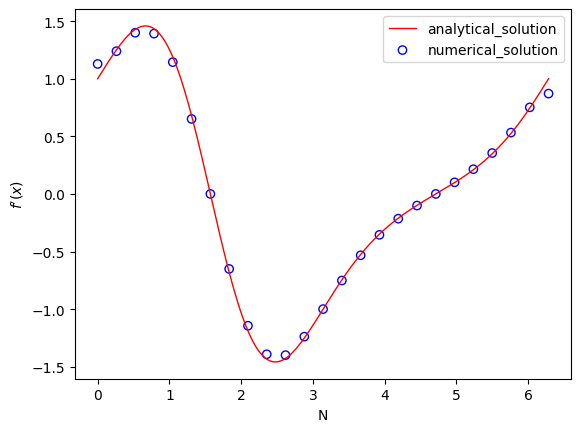

In [88]:
fig,ax = plt.subplots()
xx = np.linspace(0,2*np.pi,25)
xx_actual = np.linspace(0,2*np.pi,200)
ax.plot(xx_actual, f_x_actual(xx_actual),label="analytical_solution",c='r',linewidth=1)
ax.scatter(xx, compute_numerical_derivative(xx,f(xx)), label="numerical_solution",facecolor='none', edgecolors='blue',linewidths=1)

ax.set_xlabel('N')
ax.set_ylabel(r"$f'(x)$")
ax.legend()
plt.show()


## 2

slope p2 = -1.5047557210015314, slope pinf = -1.000936493705257


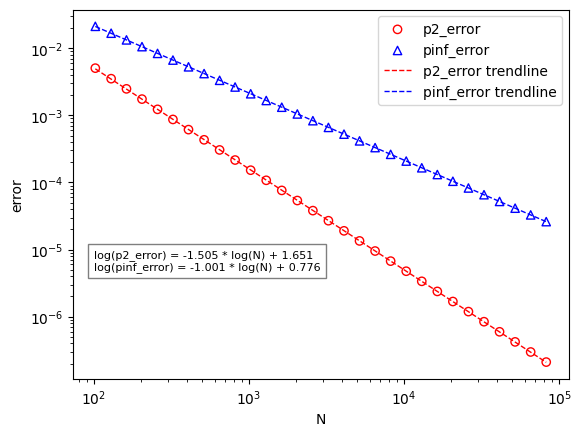

In [84]:
p2_error = np.zeros(30)
pinf_error = np.zeros(30)
nn = [int(2**(i/3)) + 1 for i in range(20,50)]
for i,n in enumerate(nn) :
    xx = np.linspace(0,2*np.pi,n)
    fxx = f(xx)
    diff = f_x_actual(xx) - compute_numerical_derivative(xx,fxx)
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(f_x_actual(xx))))
    pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(f_x_actual(xx)))


fig,ax = plt.subplots()

ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error", marker = 'o')
ax.scatter(nn, pinf_error, facecolor='none', edgecolors='blue',label="pinf_error", marker='^')

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
ax.plot(nn, np.exp(pinf_trend), 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}, slope pinf = {tlpinf[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                    "\n",
                    f"log(pinf_error) = {round(tlpinf[0],3)} * log(N) + {round(tlpinf[1],3)}"])

plt.text(100, .000005, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()


# Problem 2

In [92]:


xx = np.linspace(0,2*np.pi,30)

def compute_numerical_second_derivative(xx,fxx):
    n = len(xx)
    f_x = np.zeros((n))
    h = xx[1]-xx[0]
    #lol these were unintentionally the same line of code
    f_x[0] = (fxx[1] -2*fxx[0]+ fxx[-2])/(h**2)
    f_x[-1] = (fxx[1] -2*fxx[0]+ fxx[-2])/(h**2)
    for i in range(1,n-1):
        f_x[i] = (fxx[i+1] -2*fxx[i] + fxx[i-1])/(h**2)
    return f_x




f_xx_actual = lambda x : -1 * np.sin(x) * np.exp(np.sin(x)) + np.exp(np.sin(x)) * np.square(np.cos(x))




## 1

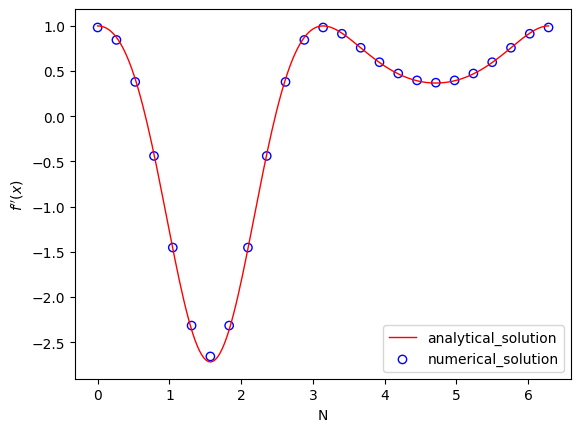

In [93]:
fig,ax = plt.subplots()
xx = np.linspace(0,2*np.pi,25)
xx_actual = np.linspace(0,2*np.pi,200)

ax.plot(xx_actual, f_xx_actual(xx_actual),label="analytical_solution",c='r',linewidth=1)
ax.scatter(xx, compute_numerical_second_derivative(xx,f(xx)), label="numerical_solution",facecolor='none', edgecolors='blue',linewidths=1)

ax.set_xlabel('N')
ax.set_ylabel(r"$f''(x)$",fontsize=10)
ax.legend()

## 2

slope p2 = -2.030421543572692, slope pinf = -2.0079894629716213


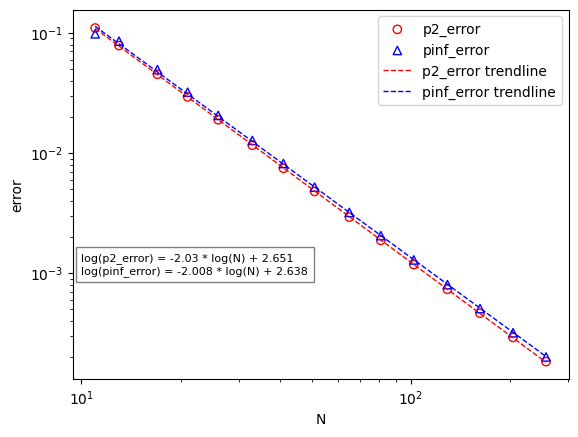

In [98]:
p2_error = np.zeros(15)
pinf_error = np.zeros(15)
nn = [int(2**(i/3)) + 1 for i in range(10,25)]
for i,n in enumerate(nn):
    xx = np.linspace(0,2*np.pi,n)
    fx = f(xx)
    # f_x = compute_numerical_second_derivative(xx,fx)
    f_xx = compute_numerical_second_derivative(xx,fx)
    diff = f_xx_actual(xx) - f_xx
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(f_xx_actual(xx))))
    pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(f_xx_actual(xx)))


fig,ax = plt.subplots()

ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
ax.scatter(nn, pinf_error, facecolor='none', edgecolors='blue',label="pinf_error",marker='^')

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
ax.plot(nn, np.exp(pinf_trend), 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}, slope pinf = {tlpinf[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                    "\n",
                    f"log(pinf_error) = {round(tlpinf[0],3)} * log(N) + {round(tlpinf[1],3)}"])

plt.text(10, .001, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()


# Problem 3

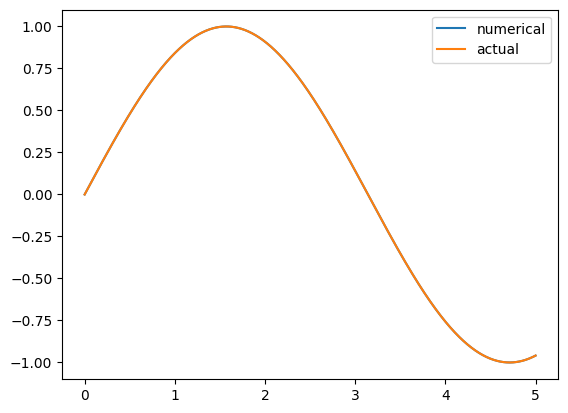

In [100]:

u = lambda x : np.sin(x)

def solve_linear_system(xx):
# A = np.zeros((15,15))
    N = len(xx)
    A = np.zeros((N,N))
    u = lambda x : np.sin(x)
    f = lambda x : np.sin(x) * np.cos(x)
    y = np.zeros(N)
    fx = np.zeros(N)
    fx = f(xx)
    h  = xx[1]-xx[0]
    A1 = np.diag(np.full(N,-2)) + np.diag(np.full(N-1,1),k=-1) + np.diag(np.full(N-1,1),k=1)
    A1[0] = np.zeros(N)
    A1[-1] = np.zeros(N)
    A1 = (1/(h**2))*A1
    A2 = np.diag(np.full(N,0)) + np.diag(np.full(N-1,-1)*np.sin(xx[1:]),k=-1) + np.diag(np.full(N-1,1)*np.sin(xx[:-1]),k=1)

    A2 = A2 * (1/ (2*h))
    A2[0,:] = np.zeros(N)
    A2[-1,:] = np.zeros(N)
    A3 = np.diag(np.full(N,1))

    A = A1 + A2 + A3 

    fx[-1] = np.sin(5)
    u_n = np.linalg.solve(A.copy(),fx)
    return u_n

N = 1000
xx = np.linspace(0,5,N)
u_n = solve_linear_system(xx)
plt.plot(xx, u_n,label = 'numerical')
plt.plot(xx,u(xx),label = 'actual')
plt.legend()

In [101]:
xx = np.linspace(0,5,5)
x = solve_linear_system(xx)


slope p2 = -2.004219139879605


C:\Users\andyh\AppData\Local\Temp\ipykernel_2468\3880439208.py:25: RuntimeWarning: divide by zero encountered in log
  tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)


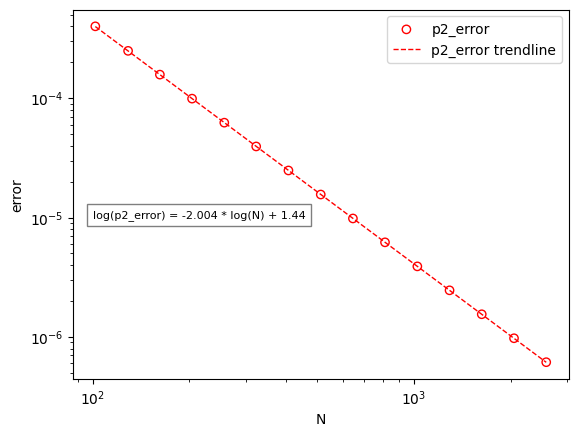

In [108]:
N = 5
# xx = np.linspace(0,5,N)
# u_n = u(xx)

p2_error = np.zeros(15)
pinf_error = np.zeros(15)
u = lambda x : np.sin(x)

nn = [int(2**(i/3)) + 1 for i in range(20,35)]
for i,n in enumerate(nn):
    xx = np.linspace(0,5,n)
    actual_u = u(xx)
    # f_x = compute_numerical_second_derivative(xx,fx)
    diff = solve_linear_system(xx) - actual_u
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(actual_u)))
    # pinf_error[i] = np.max(np.abs(diff))/np.max(np.abs(f_xx_actual(xx)))


fig,ax = plt.subplots()

ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
# ax.scatter(nn, pinf_error, facecolor='none', edgecolors='blue',label="pinf_error")

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
# pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
# ax.plot(nn, np.exp(pinf_trend), 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                  ])

plt.text(100, .00001, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()

# Problem 4

## a

In [111]:
import mayavi.mlab as mlab
import pandas as pd
import scipy.sparse as sp

def solve_linear_poisson(N):
    # N = 100
    xx = np.linspace(0,5,N)
    dx = xx[1]-xx[0]
    dy = xx[1]-xx[0]
    data = list()
    row_ind = list()
    col_ind = list()
    x_list = list()
    y_list = list()
    # i mod 100 for i, j // 100 for j
    u = lambda x,y : np.sin(x)*np.cos(y)
    f = np.zeros(N*N)
    for n in range(N*N):
        i = n % N
        j = n // N
        f[n] = -2*np.sin(xx[i]) * np.cos(xx[j])
        x_list.append(i*dx)
        y_list.append(j*dy)
        if i == 0 or i == (N-1)  or j == 0 or j == N-1:
            data.append(1)
            row_ind.append(n)
            col_ind.append(n)
            f[n] = np.sin(xx[i]) * np.cos(xx[j])

        else:
            for ii,jj,kk in zip([1,-4,1,1,1], [n-1,n,n+1,n,n], [n-1,n,n+1,n-N,n+N]):
                data.append(ii/(dx**2))
                row_ind.append(n)
                col_ind.append(kk)

    sparse_matrix = sp.csr_matrix((data['data'],(data['row_ind'],data['col_ind'])),shape=(N*N,N*N))

    u_n = sp.linalg.spsolve(sparse_matrix,f)
    xx = np.linspace(0,5,N)
    x_vals, y_vals = np.mgrid[0:5:1j*N, 0:5:1j*N]
    x_vals, y_vals = np.array(x_list).reshape(N,N), np.array(y_list).reshape(N,N)

    u_vals = np.array(u_n)
    # print(u_vals.size,x_vals.size)
    u_vals.resize(x_vals.shape)
    v_vals = u(x_vals, y_vals)
    return x_vals, y_vals, u_vals, v_vals
x,y,u,v = solve_linear_poisson(100)

In [112]:
import numpy as np
from scipy.io import savemat

# Create some NumPy arrays
X1 = x
X2 = y
U =  u
V = v

# Dictionary to hold data
data = {
    'X1': X1,  # Save x array
    'X2': X2,  # Save y array
    'U': U,   # Save z array
    'V' : V
}

# Save the data to a MATLAB .mat file
savemat('C:\\Users\\andyh\\Documents\\Projects\\matlab_environments\\3d_graph.mat', data)  # 'data.mat' is the filename

In [115]:
p2_error = np.zeros(15)
pinf_error = np.zeros(15)
u = lambda x : np.sin(x)

nn = [int(2**(i/3)) + 1 for i in range(10,25)]
for i,n in enumerate(nn):
    xx = np.linspace(0,5,n)
    actual_u = u(xx)
    x,y,un,actual = solve_linear_poisson(n) 
    # f_x = compute_numerical_second_derivative(xx,fx)
    diff = un.flatten() - actual.flatten()
    p2_error[i] = np.sqrt(np.sum(np.square(diff))) / np.sqrt(np.sum(np.square(actual)))


slope p2 = -2.0299346816672528


C:\Users\andyh\AppData\Local\Temp\ipykernel_2468\4087352529.py:7: RuntimeWarning: divide by zero encountered in log
  tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)


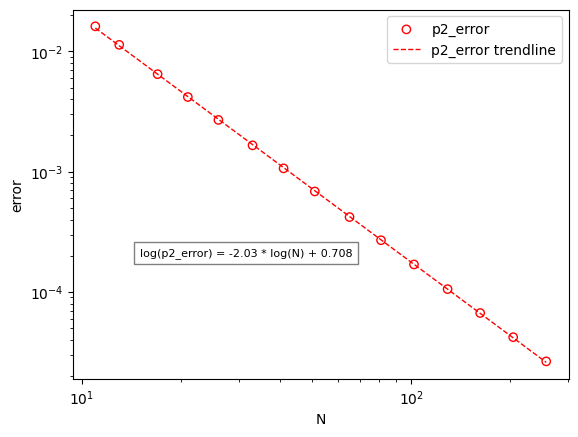

In [118]:


fig,ax = plt.subplots()

ax.scatter(nn, p2_error, facecolor='none', edgecolors='red', label="p2_error")
# ax.scatter(nn, pinf_error, facecolor='none', edgecolors='blue',label="pinf_error")

tlp2 = np.polyfit(np.log(nn), np.log(p2_error), 1)
tlpinf = np.polyfit(np.log(nn), np.log(pinf_error), 1)

p2_trend = np.dot(np.array(tlp2).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()
# pinf_trend = np.dot(np.array(tlpinf).reshape(1,-1),np.array([np.log(nn),np.ones(len(nn))])).flatten()

ax.plot(nn, np.exp(p2_trend), 'red', linewidth=1, linestyle = 'dashed',label="p2_error trendline")
# ax.plot(nn, np.exp(pinf_trend), 'blue', linewidth=1, linestyle = 'dashed',label="pinf_error trendline")

print(f'slope p2 = {tlp2[0]}')

equation = "".join([f"log(p2_error) = {round(tlp2[0],3)} * log(N) + {round(tlp2[1],3)}",
                  ])

plt.text(15, .0002, equation, fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('error')
ax.legend()

## b

In [ ]:
import mayavi.mlab as mlab
import pandas as pd
import scipy.sparse as sp

def solve_linear_poisson_b(N):
    # N = 100
    xx = np.linspace(0,5,N)
    dx = xx[1]-xx[0]
    dy = xx[1]-xx[0]
    data = list()
    row_ind = list()
    col_ind = list()
    x_list = list()
    y_list = list()
    # i mod 100 for i, j // 100 for j
    u = lambda x,y : np.sin(x)*np.cos(y)
    f = np.zeros(N*N)
    for n in range(N*N):
        i = n % N
        j = n // N
        f[n] = -2*np.sin(xx[i]) * np.cos(xx[j])
        x_list.append(i*dx)
        y_list.append(j*dy)
        if i == 0 or i == (N-1)  or j == 0 or j == N-1:
            data.append(1)
            row_ind.append(n)
            col_ind.append(n)
            f[n] = np.sin(xx[i]) * np.cos(xx[j])

        else:
            for val, idx in zip([1,-4,1,1,1], [n-1,n,n+1,n,n], [n-1,n,n+1,n-N,n+N]):
                data.append(val/(dx**2))
                row_ind.append(n)
                col_ind.append(idx)


    data = pd.DataFrame(data = zip(data,row_ind,col_ind),columns = ['data','row_ind','col_ind'])

    data = data.groupby(['row_ind','col_ind']).sum().reset_index()


    sparse_matrix = sp.csr_matrix((data['data'],(data['row_ind'],data['col_ind'])),shape=(N*N,N*N))
  
    u_n = sp.linalg.spsolve(sparse_matrix,f)
    xx = np.linspace(0,5,N)
    x_vals, y_vals = np.mgrid[0:5:1j*N, 0:5:1j*N]
    x_vals, y_vals = np.array(x_list).reshape(N,N), np.array(y_list).reshape(N,N)

    u_vals = np.array(u_n)
    # print(u_vals.size,x_vals.size)
    u_vals.resize(x_vals.shape)
    v_vals = u(x_vals, y_vals)
    return x_vals, y_vals, u_vals, v_vals


x,y,u,v = solve_linear_poisson_b(100)

In [ ]:

# mlab.figure(size=(800, 600), bgcolor=(1, 1, 1))  # Create a new figure with white background
# surface = mlab.surf(x_vals, y_vals, u_vals, colormap='viridis')  # Plot the surface with the 'viridis' colormap
# mlab.colorbar(title='Z axis', orientation='vertical')  # Vertical colorbar with label
# # print(vals)
# # Set axis labels
# mlab.axes(xlabel='X axis', ylabel='Y axis', zlabel='Z axis', color=(0, 0, 0),
#           ranges=[0, 5, 0, 5, -1, 2])
# mlab.outline(extent=[0, 5, 0, 5, -1, 2], color=(0, 0, 0))
# # mlab.view(azimuth=60, elevation=45, distance=15, focalpoint=(2.5, 2.5, 10))

# # Add a title
# # mlab.title('3D Surface Plot using Mayavi', color=(0, 0, 0), size=0.5)  # Title with black color

# # Show the plot
# mlab.show()